<a href="https://colab.research.google.com/github/dana-lu/2021-shellhacks/blob/main/Testing_with_picture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import numpy as np
import pandas as pd

import os

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

from keras.models import load_model
from keras.preprocessing import image


In [24]:
!git clone https://github.com/dana-lu/2021-shellhacks.git

Cloning into '2021-shellhacks'...
remote: Enumerating objects: 127, done.
remote: Counting objects: 100% (127/127), done.
remote: Compressing objects: 100% (97/97), done.
remote: Total 127 (delta 35), reused 93 (delta 21), pack-reused 0
Receiving objects: 100% (127/127), 1.07 MiB | 15.02 MiB/s, done.
Resolving deltas: 100% (35/35), done.


In [65]:
import os
os.chdir("/content/")

In [59]:
model  = tf.keras.models.load_model('/content/CNN_model.h5')

In [67]:
dict = {
0:'Apple___Apple_scab',
1:'Apple___Black_rot',
2:'Apple___Cedar_apple_rust',
3:'Apple___healthy',
4:'Cherry_(including_sour)___Powdery_mildew',
5:'Cherry_(including_sour)___healthy',
6:'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
7:'Corn_(maize)___Common_rust_',
8:'Corn_(maize)___Northern_Leaf_Blight',
9:'Corn_(maize)___healthy',
10:'Grape___Black_rot',
11:'Grape___Esca_(Black_Measles)',
12:'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
13:'Grape___healthy',
14:'Peach___Bacterial_spot',
15:'Peach___healthy',
16:'Pepper,_bell___Bacterial_spot',
17:'Pepper,_bell___healthy',
18:'Potato___Early_blight',
19:'Potato___Late_blight',
20:'Potato___healthy',
21:'Strawberry___Leaf_scorch',
22:'Strawberry___healthy',
23:'Tomato___Bacterial_spot',
24:'Tomato___Early_blight',
25:'Tomato___Late_blight',
26:'Tomato___Leaf_Mold',
27:'Tomato___Septoria_leaf_spot',
28:'Tomato___Spider_mites Two-spotted_spider_mite',
29:'Tomato___Target_Spot',
30:'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
31:'Tomato___Tomato_mosaic_virus',
32:'Tomato___healthy'
}

Saving 0a4795b0-5144-4dea-a7ed-b6243416e8d0___Rutg._HL 3530.JPG to 0a4795b0-5144-4dea-a7ed-b6243416e8d0___Rutg._HL 3530.JPG
[3.0469582e-09 1.0351567e-03 8.8652589e-14 9.2127586e-05 8.9637799e-09
 1.4785127e-07 7.1601038e-11 9.7671430e-14 3.2938780e-11 7.4592954e-09
 5.3670263e-08 8.0030524e-09 3.3655833e-15 2.6599890e-08 7.5581834e-02
 9.2149383e-01 8.4958067e-09 3.5122056e-07 6.8833316e-12 2.3765509e-10
 1.0017172e-06 5.1056304e-07 2.0208780e-12 3.8660797e-11 3.3663600e-04
 4.3118407e-06 3.8214108e-05 1.3842214e-03 7.5223147e-06 2.2730572e-05
 3.3905899e-11 1.1652917e-06 2.9975059e-13]


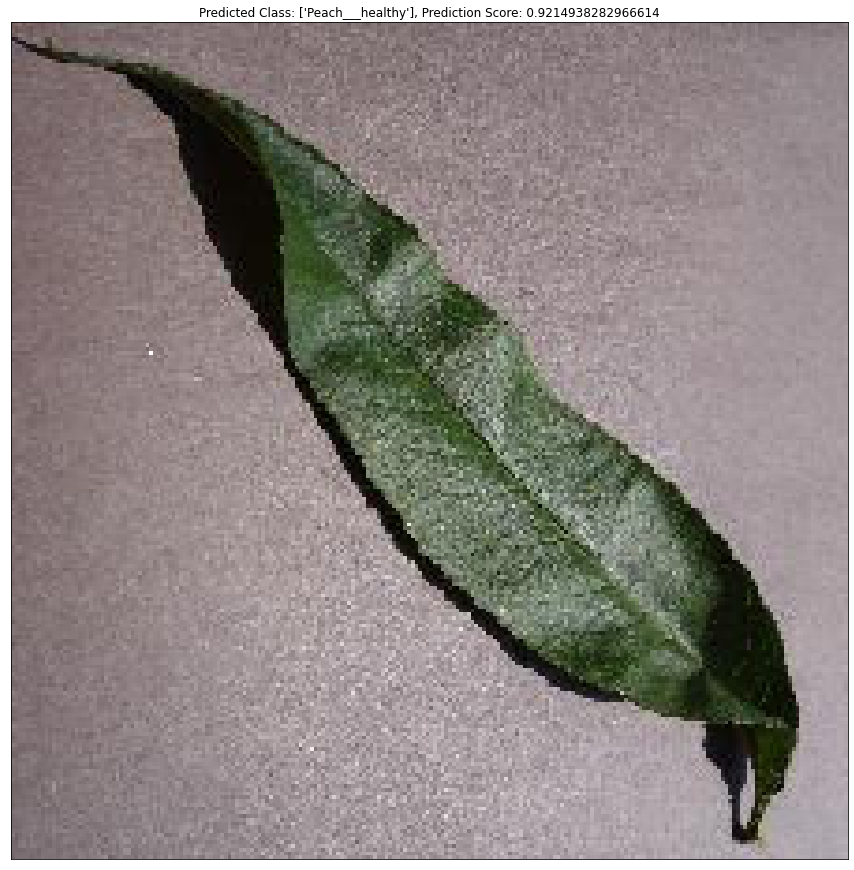

In [69]:
from google.colab import files
uploaded = files.upload()
plt.figure(figsize=(15,25))



for fn in uploaded.keys():
  # predict images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(224,224))
  plt.subplot(1,1,1)
  plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis =0)

  images = np.vstack([x])
  preds = model.predict(images, batch_size = 32)
  predictedClass = np.argmax(preds, axis=1)
  predictedClass = np.vectorize(dict.get)(predictedClass)
  print(preds[0])
  
  
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img)
  plt.title("Predicted Class: {}, Prediction Score: {}".format(predictedClass, np.max(preds)))